# Homework 6.3 - Coding

This is the coding portion of the homework assignment for Section 6.3

In [58]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import beta, uniform, norm

## Problem 6.16

We will do this in a series of steps.

First, find the mean and variance of each of these distributions, and fill them in in the markdown cell below:

* Beta(1/2, 1/2)
  - **Mean** $\mu$: _a / (a + b) = 1/2_
  - **Variance** $\sigma^2$: _ab / ((a + b)^2 * (a + b + 1)) = 1/8_

* Uniform([0,1])
  - **Mean** $\mu$: _0.5_
  - **Variance** $\sigma^2$: _1/12_

Now, create a function `sample_beta()` which samples $n$ times from the Beta(1/2, 1/2) distribution, and returns the sample mean.

Your code should accept as arguments `rng` (a numpy random number generator, from which you should sample) and `n` (the number of times to sample), and should return the sample mean.

In [59]:
def sample_beta(rng: np.random.Generator, n: int) -> float | np.floating:
    """Sample n times from the Beta(1/2, 1/2) distribution, and
    return the sample mean.
    
    Args:
        rng (np.random.Generator) - A random number generator created
            from np.random.default_rng(), from which we will sample
            from the beta distribution
        n (int) - The number of samples to draw
    
    Returns: 
        float - The sample mean
    """
    return rng.beta(0.5, 0.5, size=n).mean()
    

Now, write a similar function `sample_uniform()` which samples $n$ times from the Uniform([0,1]) distribution, and returns the sample mean.

Your code should accept as arguments `rng` (a numpy random number generator, from which you should sample) and `n` (the number of times to sample), and should return the sample mean.

In [60]:
def sample_uniform(rng: np.random.Generator, n: int) -> float | np.floating:
    """Sample n times from the Uniform([0,1]) distribution, and
    return the sample mean.
    
    Args:
        rng (np.random.Generator) - A random number generator created
            from np.random.default_rng(), from which we will sample
            from the beta distribution
        n (int) - The number of samples to draw
    
    Returns: 
        float - The sample mean
    """
    return rng.uniform(0, 1, size=n).mean()

Now, create a function `beta_1000_trials()`, which runs `sample_beta()` 1000 times and returns the results of each trial as an 1000-entry numpy array.

Your code should accept as arguments `rng` (a numpy random number generator, from which you should sample) and `n` (the number of times to sample in each trial), and should return a numpy array of the sample means generated at each trial.

In [61]:
def beta_1000_trials(rng: np.random.Generator, n: int) -> np.ndarray:
    """Repeats the following 1000 times:
    1) Sample n times from the Beta(1/2, 1/2) distribution,
    2) Return the sample mean.

    Returns the 1000 sample means as an array.
    
    Args:
        rng (np.random.Generator) - A random number generator created
            from np.random.default_rng(), from which we will sample
            from the beta distribution
        n (int) - The number of samples to drawn in each trial
    
    Returns: 
        array - The sample means from each trial
    """
    return np.array([sample_beta(rng, n) for _ in range(1000)])

Similarly, create a function `uniform_1000_trials()`, which runs `sample_uniform()` 1000 times and returns the results of each trial as an 1000-entry numpy array.

Your code should accept as arguments `rng` (a numpy random number generator, from which you should sample) and `n` (the number of times to sample in each trial), and should return a numpy array of the sample means generated at each trial.

In [62]:
def uniform_1000_trials(rng: np.random.Generator, n: int) -> np.ndarray:
    """Repeats the following 1000 times:
    1) Sample n times from the Uniform([0,1]) distribution,
    2) Return the sample mean.

    Returns the 1000 sample means as an array.
    
    Args:
        rng (np.random.Generator) - A random number generator created
            from np.random.default_rng(), from which we will sample
            from the beta distribution
        n (int) - The number of samples to drawn in each trial
    
    Returns: 
        array - The sample means from each trial
    """
    return np.array([sample_uniform(rng, n) for _ in range(1000)])

Now, write a function `draw_beta_plots()` that accepts an argument `n` and does the following:

1. Plot the p.d.f of Beta(1/2, 1/2)
2. On the same plot, plot the p.d.f of the normal distribution with mean $\mu$ and standard deviation $\frac{\sigma}{\sqrt{n}} = \sqrt{\frac{\sigma^2}{n}}$ (where $\mu$ and $\sigma^2$ were calculated at the beginning of this notebook)
3. Create a random-number-generator object `rng`
4. Use `rng` and `n` to run `beta_1000_trials()`, which will run 1000 trials of sampling $n$ times from the Beta(1/2, 1/2) distribution, and get the results in an array
5. On the same plot as steps (1) and (2), plot a normed histogram (that is, a histogram scaled to have total area 1) of the results of step (4).
6. Title your plot with the distribution name and value of `n` being used.
7. Show the plot

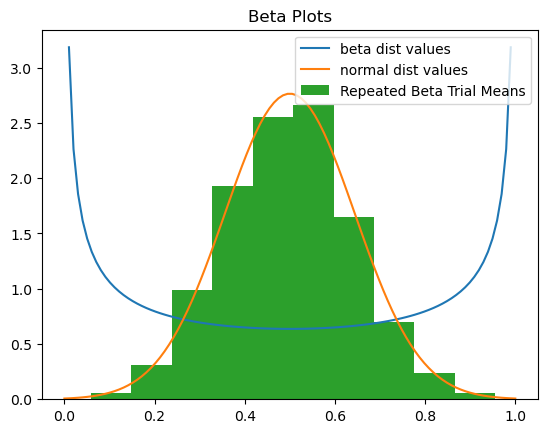

In [63]:
def draw_beta_plots(n: int):
    """Draws the plots requested in Problem 6.16 for Beta(1/2, 1/2) and a given value of n."""
    support = np.linspace(0, 1, 100)

    beta_values = beta.pdf(support, 0.5, 0.5)
    plt.plot(support, beta_values, label = "beta dist values")

    norm_values = norm.pdf(support, 1/2, np.sqrt((1/8) / n))
    plt.plot(support, norm_values, label = "normal dist values")
    plt.title("Beta Plots")

    rng = np.random.default_rng()
    arr = beta_1000_trials(rng, n)
    plt.hist(arr, density=True, label="Repeated Beta Trial Means")

    plt.legend()

    plt.show()

draw_beta_plots(6)

Similarly, write a function `draw_uniform_plots()` that accepts an argument `n` and does the following:

1. Plot the p.d.f of Uniform([0,1])
2. On the same plot, plot the p.d.f of the normal distribution with mean $\mu$ and standard deviation $\frac{\sigma}{\sqrt{n}} = \sqrt{\frac{\sigma^2}{n}}$ (where $\mu$ and $\sigma^2$ were calculated at the beginning of this notebook)
3. Create a random-number-generator object `rng`
4. Use `rng` and `n` to run `uniform_1000_trials()`, which will run 1000 trials of sampling $n$ times from the Beta(1/2, 1/2) distribution, and get the results in an array
5. On the same plot as steps (1) and (2), plot a normed histogram (that is, a histogram scaled to have total area 1) of the results of step (4).
6. Title your plot with the distribution name and value of `n` being used.
7. Show the plot

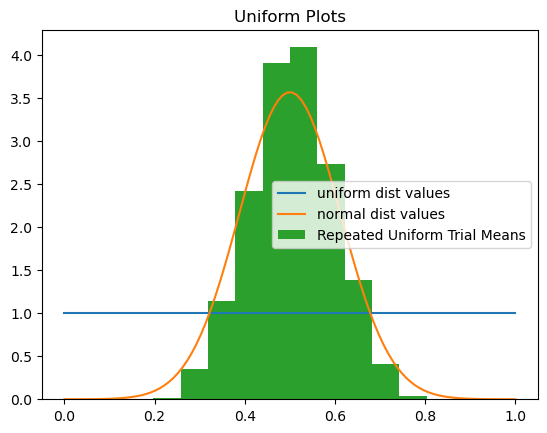

In [64]:
def draw_uniform_plots(n: int):
    """Draws the plots requested in Problem 6.16 for Uniform([0,1]) and a given value of n."""
    support = np.linspace(0, 1, 100)
    uni_values = uniform.pdf(support, 0, 1)
    plt.plot(support, uni_values, label = "uniform dist values")
    plt.title("p.d.f. of Beta(1/2,1/2)")

    norm_values = norm.pdf(support, 1/2, np.sqrt((1/8) / n))
    plt.plot(support, norm_values, label = "normal dist values")
    plt.title("Uniform Plots")

    rng = np.random.default_rng()
    arr = uniform_1000_trials(rng, n)
    plt.hist(arr, density=True, label = "Repeated Uniform Trial Means")

    plt.legend()
    plt.show()

draw_uniform_plots(10)









Finally, in the code cell below, use `draw_beta_plots()` and `draw_uniform_plots()` to draw plots for each $n \in \{1,2,4,6,16,32\}$.

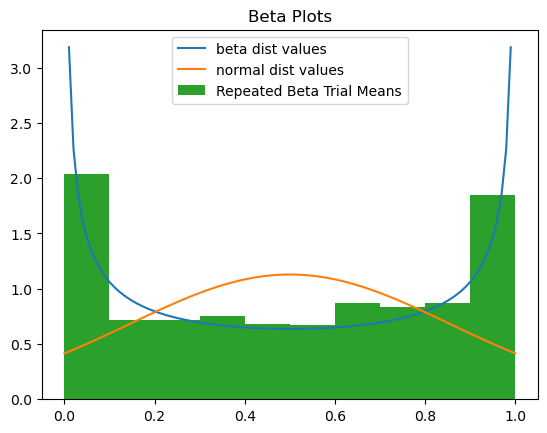

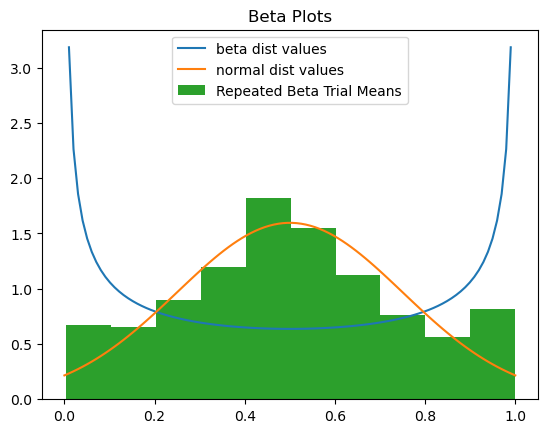

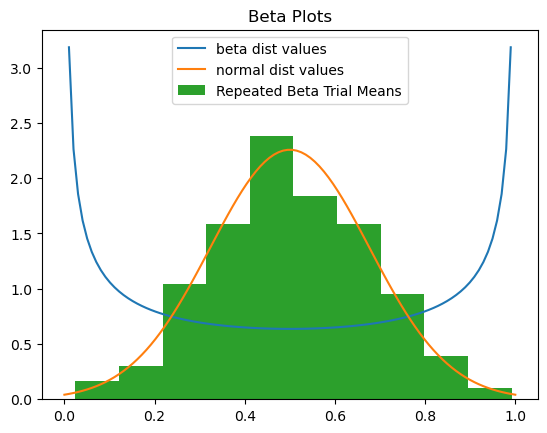

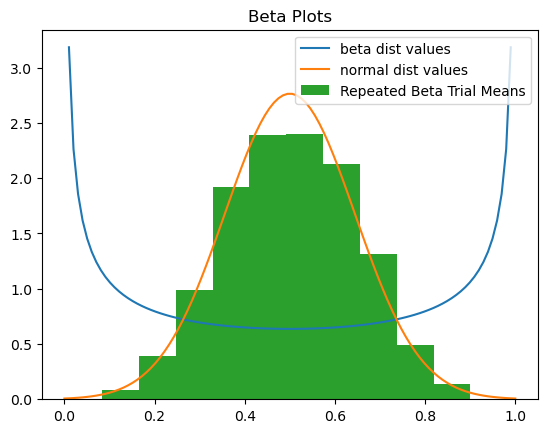

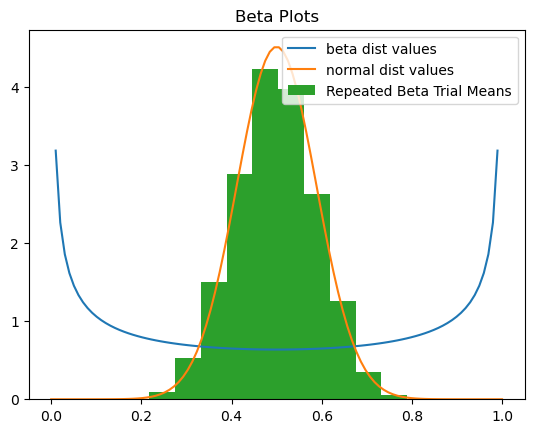

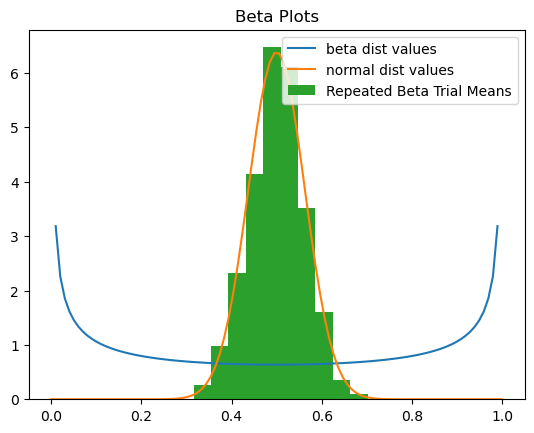

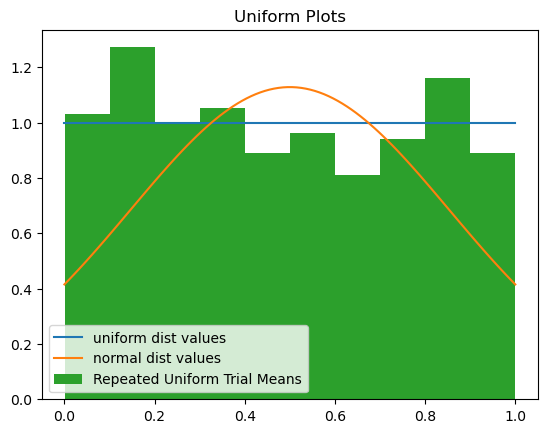

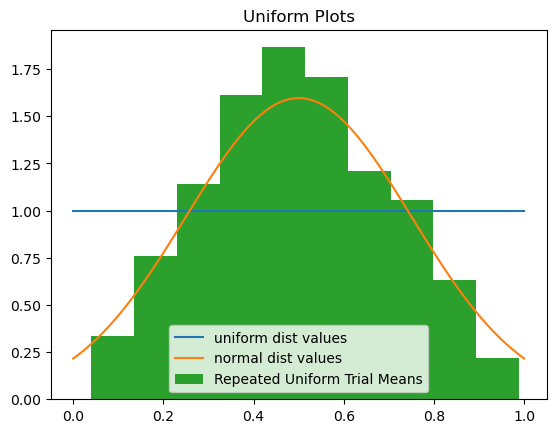

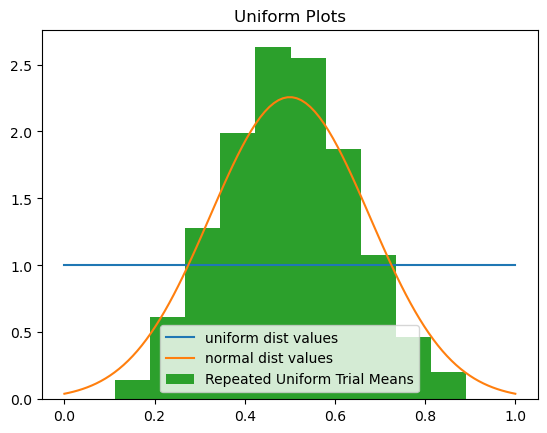

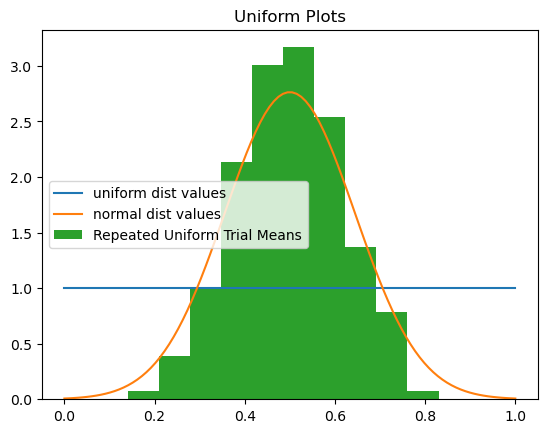

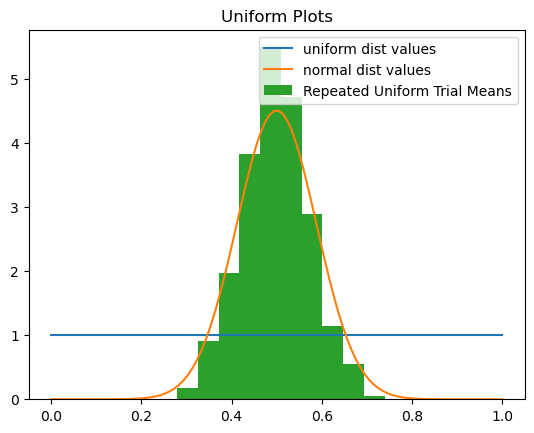

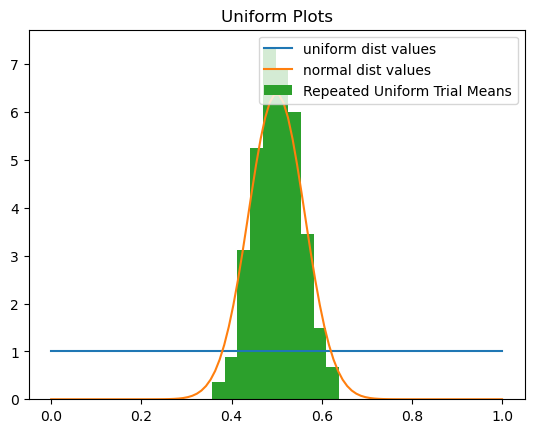

In [65]:
for n in [1, 2, 4, 6, 16, 32]:
    draw_beta_plots(n)

for n in [1, 2, 4, 6, 16, 32]:
    draw_uniform_plots(n)


---

IMPORTANT: Please "Restart and Run All" and ensure there are no errors. Then, submit this .ipynb file to Gradescope.